In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [25]:

def plot_relation(original_df, col1, col2, criteria='median', style=None):
    grp = df.groupby([col1])
    cust_series = {col1: [], col2: []}
    for key, item in grp:
        col2_criteria = 0
        if criteria == 'median':
            col2_criteria = item[col2].median()
        elif criteria == 'mode':
            col2_criteria = item[col2].mode()[0]
        else:
            col2_criteria = item[col2].mean()

        cust_series[col1].append(key)
        cust_series[col2].append(col2_criteria)

    df2 = pd.DataFrame.from_dict(cust_series)
    if style is None:
        df2.plot(x=col1, y=col2)
    else:
        df2.plot(x=col1, y=col2, style=style)


In [26]:
df = pd.read_csv('./ml_task_data.csv')
df['CompletionDate'] = pd.to_datetime(df.CompletionDate)
df['CompletionDate'] = df['CompletionDate'].dt.strftime('%Y')

df['SpudDate'] = pd.to_datetime(df.SpudDate)
df['SpudDate'] = df['SpudDate'].dt.strftime('%Y')

df.dropna(how='all', subset=['SpudDate'], inplace=True)

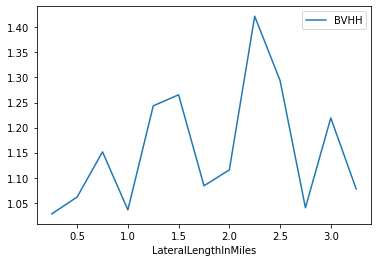

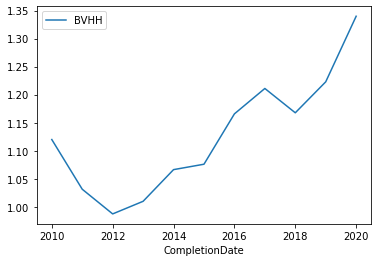

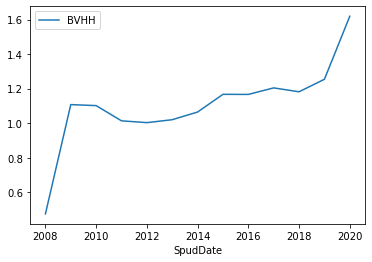

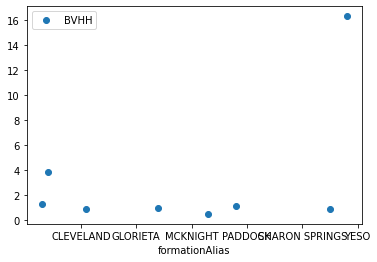

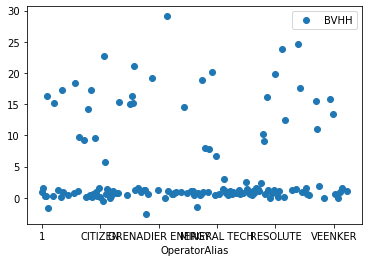

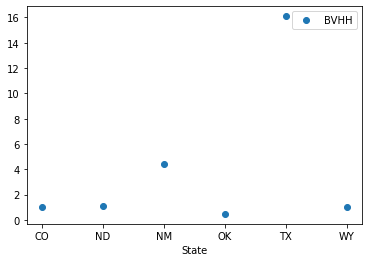

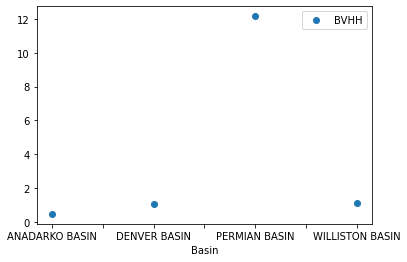

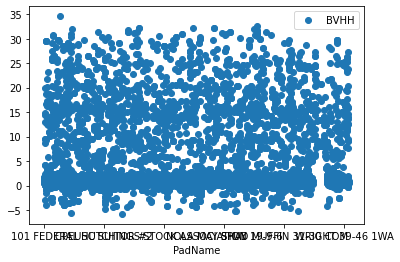

In [12]:
plot_relation(df, 'LateralLengthInMiles', 'BVHH', 'median') # bvhh does not depend on lateral length in miles
plot_relation(df, 'CompletionDate', 'BVHH', 'median') # bvhh depends on completion date
plot_relation(df, 'SpudDate', 'BVHH', 'median') # bvhh also depends on spud date, but spud date already depends on completion date, select one
plot_relation(df, 'formationAlias', 'BVHH', 'median', style='o') # does not depend
plot_relation(df, 'OperatorAlias', 'BVHH', 'median', style='o') # does not depend
plot_relation(df, 'State', 'BVHH', 'median', style='o') # Depends
plot_relation(df, 'Basin', 'BVHH', 'median', style='o') # Depends, but basin and state are related, choose one
plot_relation(df, 'PadName', 'BVHH', 'median', style='o') # Depends, but basin and state are related, choose one

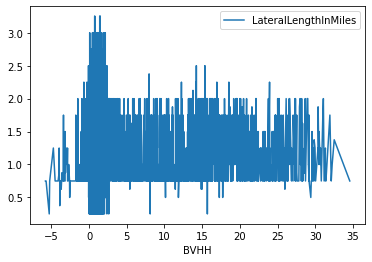

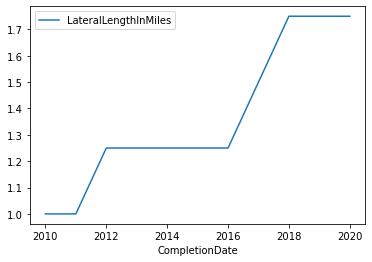

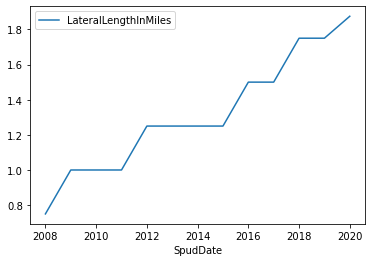

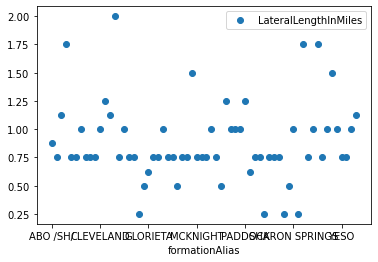

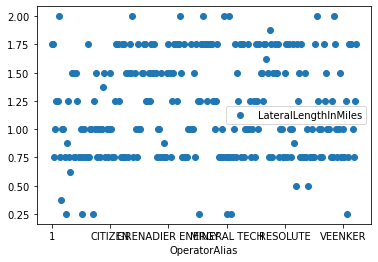

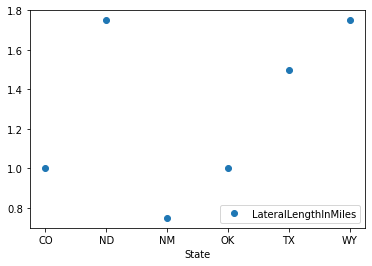

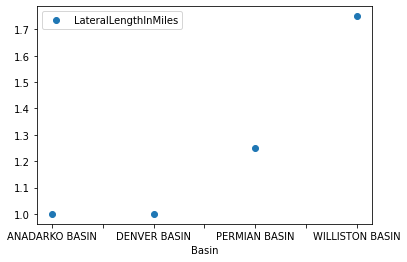

In [36]:

plot_relation(df, 'BVHH', 'LateralLengthInMiles', 'median')
plot_relation(df, 'CompletionDate', 'LateralLengthInMiles', 'median')
plot_relation(df, 'SpudDate', 'LateralLengthInMiles', 'median')
plot_relation(df, 'formationAlias', 'LateralLengthInMiles', 'median', style='o')
plot_relation(df, 'OperatorAlias', 'LateralLengthInMiles', 'median', style='o')
plot_relation(df, 'State', 'LateralLengthInMiles', 'median', style='o')
plot_relation(df, 'Basin', 'LateralLengthInMiles', 'median', style='o')
# LateralLengthInMiles Depends on -> CompletionDate, SpudDate, formationAlias(little), state, basin



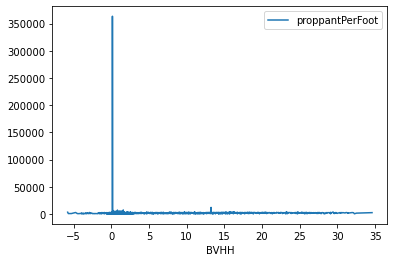

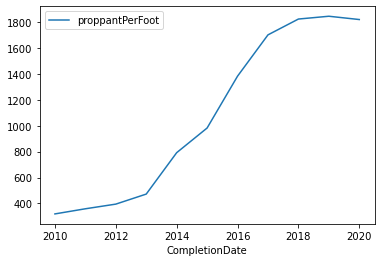

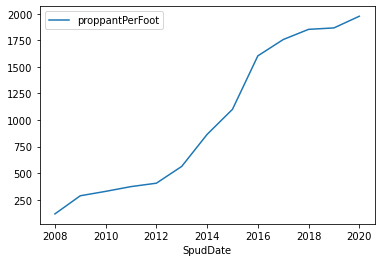

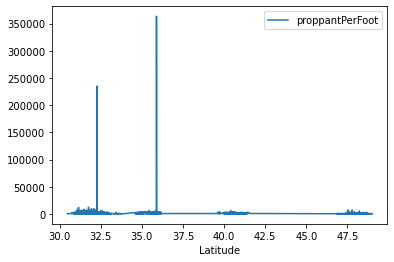

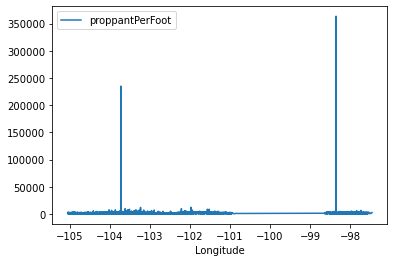

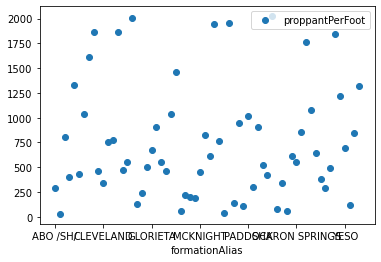

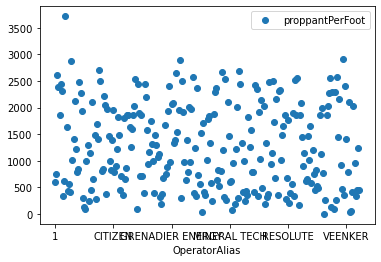

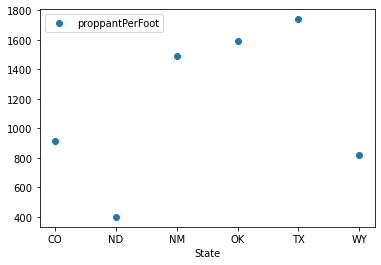

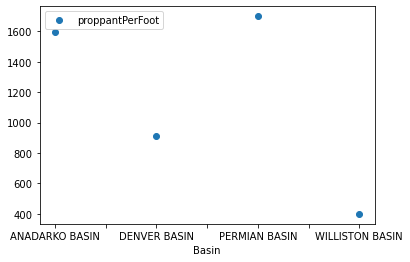

In [38]:

plot_relation(df, 'BVHH', 'proppantPerFoot', 'median')
plot_relation(df, 'CompletionDate', 'proppantPerFoot', 'median')
plot_relation(df, 'SpudDate', 'proppantPerFoot', 'median')
plot_relation(df, 'Latitude', 'proppantPerFoot', 'median')
plot_relation(df, 'Longitude', 'proppantPerFoot', 'median')
plot_relation(df, 'formationAlias', 'proppantPerFoot', 'median', style='o')
plot_relation(df, 'OperatorAlias', 'proppantPerFoot', 'median', style='o')
plot_relation(df, 'State', 'proppantPerFoot', 'median', style='o')
plot_relation(df, 'Basin', 'proppantPerFoot', 'median', style='o')
# proppantPerFoot Depends on -> BVHH, CompletionDate, SpudDate, formationAlias, OperatorAlias, state, basin, latitude, longitude
# latitude and longitude, state, basin ARE ALL DEPENDENT, choose best one




In [ ]:
df['CompletionDate'] = df['CompletionDate'].astype(int)

In [9]:
print(df.corr()['BVHH'])

Latitude               -0.550508
Longitude              -0.096380
LateralLengthInMiles   -0.140140
BVHH                    1.000000
proppantPerFoot         0.108274
Name: BVHH, dtype: float64


In [11]:
one_hot = pd.get_dummies(df['PadName'])

In [12]:
df = df.drop('PadName',axis = 1)

In [13]:
df = df.join(one_hot)


In [20]:
df['CRANE FEDERAL'].value_counts()

0    50955
1        3
Name: CRANE FEDERAL, dtype: int64

In [6]:
print(df['PadName'].value_counts())

WILSON IC                  27
COYOTE TRAILS              27
TROUDT #4                  24
ORR STATE                  24
HWY 52                     23
                           ..
BOHMBACH #2                 1
BLACKJACK WC                1
MONROE 34-188 #2            1
LANGVED #5                  1
GRAMA 8817 JV-P FED COM     1
Name: PadName, Length: 25358, dtype: int64


In [20]:
print(df['OperatorAlias'].value_counts())
print(df.loc[df['State'] == 'CO', 'OperatorAlias'].value_counts())

OXY                    3690
EOG                    2268
CONTINENTAL            2126
PIONEER                2111
EXXONMOBIL             1828
                       ... 
JMA                       1
TERRITORY RESOURCES       1
OKLAHOMA ENERGY           1
CARRIZO                   1
BURNETT                   1
Name: OperatorAlias, Length: 262, dtype: int64
OXY                    2035
NOBLE                  1346
PDC                    1213
EXTRACTION              693
CRESTONE PEAK           512
BONANZA CREEK           413
GREAT WESTERN           275
HIGHPOINT               274
WHITING                 261
VERDAD                  135
BAYSWATER                79
CUB CREEK                52
BISON                    24
CONFLUENCE               23
CONOCOPHILLIPS           19
PETRO OPERATING          19
PACIFIC ENERGY           13
EDGE                     13
ENERPLUS                 11
PETROSHARE               10
1                         8
MALLARD EXPLORATION       5
CCRP                      5
N

In [23]:
df['OperatorAlias']=df['OperatorAlias'].astype('category').cat.codes
df['formationAlias']=df['formationAlias'].astype('category').cat.codes
df['State']=df['State'].astype('category').cat.codes
df['Basin']=df['Basin'].astype('category').cat.codes
df.corr()

,Basin,State,Latitude,Longitude,OperatorAlias,formationAlias,LateralLengthInMiles,BVHH,proppantPerFoot
Basin,1.000000,-0.098519,0.424705,-0.375884,0.110510,-0.200405,0.292439,-0.001265,-0.117128
State,-0.098519,1.000000,-0.741925,0.423680,-0.081983,0.466011,0.000176,0.570836,0.189350
Latitude,0.424705,-0.741925,1.000000,-0.198401,0.135749,-0.460633,0.263601,-0.550508,-0.232393
Longitude,-0.375884,0.423680,-0.198401,1.000000,-0.092313,0.234852,0.077276,-0.096380,0.082650
OperatorAlias,0.110510,-0.081983,0.135749,-0.092313,1.000000,0.023940,0.112294,-0.018595,-0.035802
formationAlias,-0.200405,0.466011,-0.460633,0.234852,0.023940,1.000000,0.027812,0.319333,0.137302
LateralLengthInMiles,0.292439,0.000176,0.263601,0.077276,0.112294,0.027812,1.000000,-0.140140,0.025027
BVHH,-0.001265,0.570836,-0.550508,-0.096380,-0.018595,0.319333,-0.140140,1.000000,0.108274
proppantPerFoot,-0.117128,0.189350,-0.232393,0.082650,-0.035802,0.137302,0.025027,0.108274,1.000000


In [ ]:
# formation alias -> state, bvhh
# operator alias -> basin, lateral length in miles
# proppantPerFoot -> longitude, latitude, formationAlias